In [2]:
import sys
import pandas as pd
import numpy
import matplotlib


In [3]:
df = pd.read_csv('data/washdash-download.csv')

In [4]:
df.head()

,Type,Region,Residence Type,Service Type,Year,Coverage,Population,Service level
0,sdg,Australia and New Zealand,total,Sanitation,2000,39.38183,9.028221e+06,Basic service
1,sdg,Australia and New Zealand,total,Sanitation,2000,0.00000,0.000000e+00,Limited service
2,sdg,Australia and New Zealand,total,Sanitation,2000,0.00000,0.000000e+00,Open defecation
3,sdg,Australia and New Zealand,total,Sanitation,2000,60.61081,1.389493e+07,Safely managed service
4,sdg,Australia and New Zealand,total,Sanitation,2000,0.00736,1.686995e+03,Unimproved


In [6]:
df['Service Type']

0           Sanitation
1           Sanitation
2           Sanitation
3           Sanitation
4           Sanitation
             ...      
3750    Drinking water
3751    Drinking water
3752    Drinking water
3753    Drinking water
3754    Drinking water
Name: Service Type, Length: 3755, dtype: object

In [7]:
hygienedf = df[df['Service Type'] == 'Hygiene']

In [8]:
hygienedf.head()

,Type,Region,Residence Type,Service Type,Year,Coverage,Population,Service level
642,sdg,Central and Southern Asia,total,Hygiene,2012,57.84334,1.051816e+09,Basic service
643,sdg,Central and Southern Asia,rural,Hygiene,2012,47.44093,5.708853e+08,Basic service
644,sdg,Central and Southern Asia,urban,Hygiene,2012,78.19666,4.809309e+08,Basic service
645,sdg,Central and Southern Asia,total,Hygiene,2012,37.61230,6.839375e+08,Limited service
646,sdg,Central and Southern Asia,rural,Hygiene,2012,47.02904,5.659288e+08,Limited service


In [9]:
hygienedf_total = hygienedf[hygienedf['Residence Type'] == 'total']

In [10]:
hygienedf_total.head()

,Type,Region,Residence Type,Service Type,Year,Coverage,Population,Service level
642,sdg,Central and Southern Asia,total,Hygiene,2012,57.84334,1.051816e+09,Basic service
645,sdg,Central and Southern Asia,total,Hygiene,2012,37.61230,6.839375e+08,Limited service
648,sdg,Central and Southern Asia,total,Hygiene,2012,4.54436,8.263401e+07,No handwashing facility
679,sdg,Central and Southern Asia,total,Hygiene,2013,57.95544,1.068202e+09,Basic service
682,sdg,Central and Southern Asia,total,Hygiene,2013,37.51056,6.913733e+08,Limited service


In [11]:
hygienedf_total.to_csv('data/hygienedf_data.csv')

In [12]:
y = hygienedf_total.drop(['Population', 'Type', 'Residence Type', 'Service Type'], axis =1)
hygienedf_total.head()

,Type,Region,Residence Type,Service Type,Year,Coverage,Population,Service level
642,sdg,Central and Southern Asia,total,Hygiene,2012,57.84334,1.051816e+09,Basic service
645,sdg,Central and Southern Asia,total,Hygiene,2012,37.61230,6.839375e+08,Limited service
648,sdg,Central and Southern Asia,total,Hygiene,2012,4.54436,8.263401e+07,No handwashing facility
679,sdg,Central and Southern Asia,total,Hygiene,2013,57.95544,1.068202e+09,Basic service
682,sdg,Central and Southern Asia,total,Hygiene,2013,37.51056,6.913733e+08,Limited service


In [13]:
hygienedf_spread = pd.pivot_table(hygienedf_total, values = 'Coverage', index=['Region','Year'], columns = 'Service level').reset_index()
hygienedf_spread.head()

Service level,Region,Year,Basic service,Limited service,No handwashing facility
0,Central and Southern Asia,2012,57.84334,37.61230,4.54436
1,Central and Southern Asia,2013,57.95544,37.51056,4.53400
2,Central and Southern Asia,2014,58.06169,37.41489,4.52342
3,Central and Southern Asia,2015,58.16124,37.32596,4.51279
4,Central and Southern Asia,2017,58.38168,37.12723,4.49109


In [14]:
hygienedf = hygienedf_spread

In [15]:
hygienedf.head()

Service level,Region,Year,Basic service,Limited service,No handwashing facility
0,Central and Southern Asia,2012,57.84334,37.61230,4.54436
1,Central and Southern Asia,2013,57.95544,37.51056,4.53400
2,Central and Southern Asia,2014,58.06169,37.41489,4.52342
3,Central and Southern Asia,2015,58.16124,37.32596,4.51279
4,Central and Southern Asia,2017,58.38168,37.12723,4.49109


In [16]:
hygienedf['Region'].unique()

array(['Central and Southern Asia', 'Northern Africa and Western Asia',
       'Sub-Saharan Africa'], dtype=object)

In [17]:
df_csa = hygienedf[hygienedf['Region'] == 'Central and Southern Asia']
df_nawa = hygienedf[hygienedf['Region'] == 'Northern Africa and Western Asia']
df_ssa = hygienedf[hygienedf['Region'] == 'Sub-Saharan Africa']

In [18]:
import matplotlib.pyplot as plt

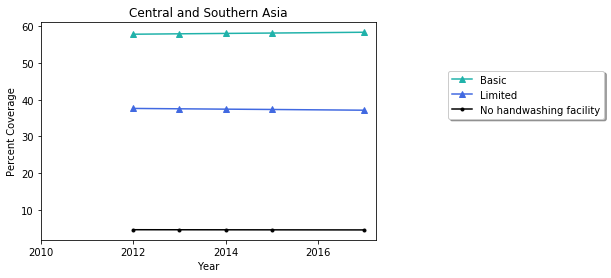

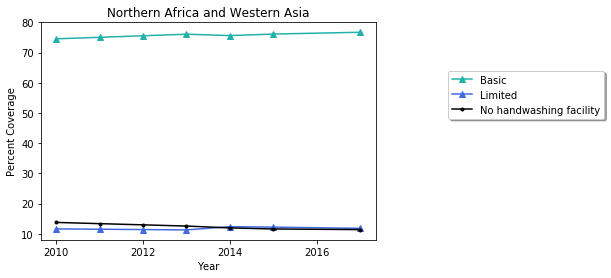

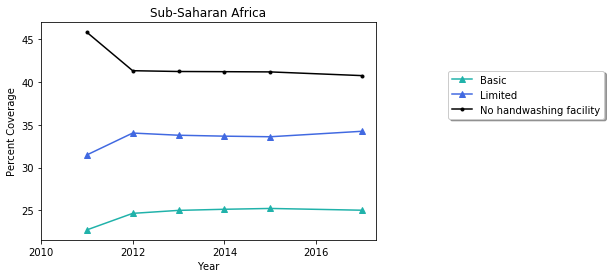

In [19]:
from matplotlib import pyplot
sdg_regions = [df_csa,df_nawa,df_ssa]
sdg_region_title = [ 'Central and Southern Asia',
                   'Northern Africa and Western Asia', 
                   'Sub-Saharan Africa']
index = 0
for region in sdg_regions: 
        title = sdg_region_title[index]
        
        plt.plot(region['Year'], region['Basic service'], fillstyle = 'full',color = 'lightseagreen', marker = '^', label = "Basic")
        plt.plot(region['Year'], region['Limited service'], fillstyle = 'full',color = 'royalblue', marker = '^', label = 'Limited')
        plt.plot(region['Year'], region['No handwashing facility'], fillstyle = 'full',color = 'black', marker = '.', label = "No handwashing facility")
        
        plt.legend(loc='upper center', bbox_to_anchor=(1.45, 0.8), shadow=True, ncol=1)
        plt.xticks(range(2010,2017,2))
        plt.xlabel('Year')
        plt.ylabel('Percent Coverage')
        plt.title(title)
        plt.show()        
        index += 1

In [21]:
hygienedf.to_csv('data/hygiene_cleaned.csv')